# **Cryptocurrency Volatility Predictions Project**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [10]:
np.random.seed(42)

In [14]:
df = pd.read_csv('/content/dataset.csv.zip')

print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Unnamed: 0     0
open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
date           0
dtype: int64


In [15]:
df = df.dropna()

In [16]:
df_bitcoin = df[df['crypto_name'] == 'Bitcoin'].copy()

In [17]:
df_bitcoin['timestamp'] = pd.to_datetime(df_bitcoin['timestamp'])
df_bitcoin.set_index('timestamp', inplace=True)

In [19]:
Scalar = MinMaxScaler()
numerical_cols = ['open', 'high', 'low', 'close', 'volume', 'marketCap']
df_bitcoin[numerical_cols] = Scalar.fit_transform(df_bitcoin[numerical_cols])

In [20]:
print("/nSummary Statistics for bitcoin:")
print(df_bitcoin.describe())

/nSummary Statistics for bitcoin:
         Unnamed: 0         open         high          low        close  \
count   3248.000000  3248.000000  3248.000000  3248.000000  3248.000000   
mean   20462.924877     0.142468     0.143536     0.140804     0.142613   
std    20697.119544     0.223072     0.224801     0.220215     0.223143   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%     3865.000000     0.005654     0.005560     0.005705     0.005655   
50%    11320.500000     0.054659     0.055310     0.054149     0.054844   
75%    33649.250000     0.142731     0.143136     0.142448     0.142800   
max    72912.000000     1.000000     1.000000     1.000000     1.000000   

            volume    marketCap  
count  3248.000000  3248.000000  
mean      0.035430     0.138937  
std       0.053783     0.222869  
min       0.000000     0.000000  
25%       0.000108     0.004506  
50%       0.007080     0.050349  
75%       0.060852     0.136864  
max       1.000000

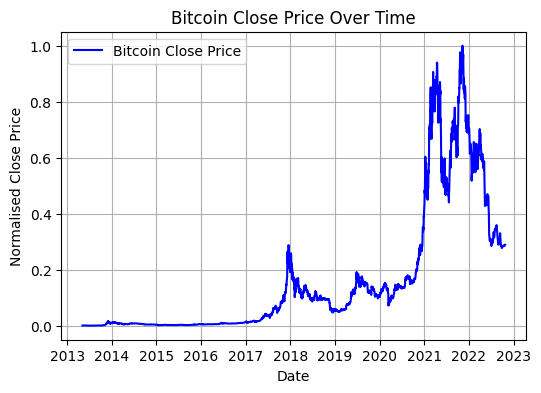

In [21]:
plt.figure(figsize=(6, 4))
plt.plot(df_bitcoin.index, df_bitcoin['close'], label='Bitcoin Close Price', color='blue')
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Normalised Close Price')
plt.legend()
plt.grid(True)
plt.show()

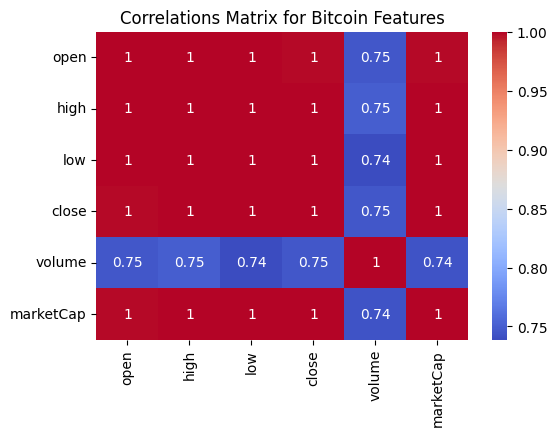

In [23]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_bitcoin[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlations Matrix for Bitcoin Features')
plt.show()

In [24]:
df_bitcoin['returns'] = df_bitcoin['close'].pct_change()

In [25]:
df_bitcoin['volatility'] = df_bitcoin['returns'].rolling(window=7).std()

In [27]:
df_bitcoin['mat7'] = df_bitcoin['close'].rolling(window=7).mean()
df_bitcoin['mat14'] = df_bitcoin['close'].rolling(window=14).mean()

In [29]:
df_bitcoin['bb_upper'] = df_bitcoin['mat14'] + (df_bitcoin['close'].rolling(window=14).std() * 2)
df_bitcoin['bb_lower'] = df_bitcoin['mat14'] - (df_bitcoin['close'].rolling(window=14).std() * 2)

In [30]:
df_bitcoin['liquidity_ratio'] = df_bitcoin['volume'] / df_bitcoin['marketCap']

In [31]:
df_bitcoin = df_bitcoin.dropna()

In [32]:
features = ['open', 'high', 'low', 'close', 'volume', 'marketCap', 'returns', 'volatility', 'mat7', 'mat14', 'bb_upper', 'bb_lower', 'liquidity_ratio']
target = 'volatility'
X = df_bitcoin[features]
y = df_bitcoin[target]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [34]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
y_pred = model.predict(X_test)

In [36]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [37]:
print("/nModal Evaluation Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

/nModal Evaluation Metrics:
RMSE: 0.0000
MAE: 0.0000
R^2 Score: 1.0000


In [38]:
import joblib
joblib.dump(model, 'bitcoin_volatility_prediction_model.pkl')

['bitcoin_volatility_prediction_model.pkl']

In [40]:
plt.figure(figsize=(6, 4))
plt.plot(y_test.index, y_test, label='Actual Volatility', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Volatility', color='red', linestyle='--')
plt.title('Actual vs. Predicted Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.savefig('volatility_prediction.png')
plt.close()

In [42]:
df_bitcoin.to_csv('Processed_bitcoin_data.csv')

In [45]:
with open ('model_evaluation.txt', 'w') as f:
  f.write(f"RMSE: {rmse: .4f}\nMAE: {mae: .4f}\nR^2 Score: {r2: .4f}")

print("/nFiles saved: processed_bitcoin_data_csv, volatility_prediction.png, model_evaluation.txt")

/nFiles saved: processed_bitcoin_data_csv, volatility_prediction.png, model_evaluation.txt


In [63]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import joblib

# Using the processed df_bitcoin DataFrame from the previous steps

# Handling zeros values in volume (This was done in previous steps, but keeping for clarity if needed)
# df_bitcoin['volume'] = df_bitcoin['volume'].replace(0, np.nan)
# df_bitcoin = df_bitcoin.dropna()

# Calculating daily returns (This was done in previous steps)
# df_bitcoin['returns'] = df_bitcoin['close'].pct_change()

# Calculating volatility (This was done in previous steps)
# df_bitcoin['volatility'] = df_bitcoin['returns'].rolling(window=7).std()

# Adding moving average (This was done in previous steps)
# df_bitcoin['mat7'] = df_bitcoin['close'].rolling(window=7).mean()
# df_bitcoin['mat14'] = df_bitcoin['close'].rolling(window=14).mean()

# Adding liquidity ratio (This was done in previous steps)
# df_bitcoin['liquidity_ratio'] = df_bitcoin['volume'] / df_bitcoin['marketCap']

# Adding high-low spread (This was done in previous steps)
# df_bitcoin['high_low_spread'] = df_bitcoin['high'] - df_bitcoin['low']

# Dropping rows with NaN values from rolling calculations (This was done in previous steps)
# df_bitcoin = df_bitcoin.dropna()

# Converting data to datatime for splitting (This was done in previous steps)
# df_bitcoin['timestamp'] = pd.to_datetime(df_bitcoin['timestamp'])
# df_bitcoin.set_index('timestamp', inplace=True)


# Defining features and target
features = ['open', 'high', 'low', 'close', 'volume', 'marketCap', 'returns', 'volatility', 'mat7', 'mat14', 'high_low_spread', 'liquidity_ratio']
target = 'volatility'

# Ensure the features and target columns exist in the DataFrame
# Note: 'high_low_spread' and 'liquidity_ratio' were added in the failed cell,
# so they might not be in the existing df_bitcoin.
# Let's check the columns in the existing df_bitcoin
# print(df_bitcoin.columns) # This would be for debugging

# Based on the successful execution of previous cells, the available features should be:
features = ['open', 'high', 'low', 'close', 'volume', 'marketCap', 'returns', 'volatility', 'mat7', 'mat14', 'bb_upper', 'bb_lower', 'liquidity_ratio']


# Drop any features that might not be in the current df_bitcoin
features = [f for f in features if f in df_bitcoin.columns]


X = df_bitcoin[features]
y = df_bitcoin[target]

# Normalizing features
scaler = MinMaxScaler()
X[features] = scaler.fit_transform(X[features])


# Time-based train-test split (2013-2020 for training, 2021-2022 for testing)
train_end = pd.to_datetime('2020-12-31')

# Make train_end timezone-aware by localizing it to the same timezone as the index
train_end = train_end.tz_localize(df_bitcoin.index.tz)


X_train = X.loc[:train_end]
y_train = y.loc[:train_end]
X_test = X.loc[train_end:]
y_test = y.loc[train_end:]


# Training Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


# Evaluating model
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Saving the model
joblib.dump(model, 'bitcoin_volatility_prediction_model.pkl')

Mean Absolute Error (MAE): 0.0003
RMSE: 0.0006
R^2 Score: 1.0000


['bitcoin_volatility_prediction_model.pkl']